In [1]:
import os
import pandas as pd

file_path = 'C:/Users/ACER/OneDrive/Documents/New folder/btvn/ML/household_power_consumption.txt'

df = pd.read_csv(file_path, sep=';', header=0, low_memory=False)

for col in df.columns:
    if col not in ['Date', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.dtypes)

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [2]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.shape

(2075259, 9)

In [4]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
df.dropna(inplace=True)

Feature Engineering

Create Datetime column and time properties

In [6]:
from datetime import datetime

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

Handling Missing Value

In [7]:
null_values = df.isnull().sum()
null_df = pd.DataFrame(null_values, columns=['Null Values'])

missing_values = df.isna().sum()
missing_df = pd.DataFrame(missing_values, columns=['Missing Values'])

comparision_df = pd.concat([null_df, missing_df], axis=1)
print("Null and Missing Values per Column")
print(comparision_df)

Null and Missing Values per Column
                       Null Values  Missing Values
Date                             0               0
Time                             0               0
Global_active_power              0               0
Global_reactive_power            0               0
Voltage                          0               0
Global_intensity                 0               0
Sub_metering_1                   0               0
Sub_metering_2                   0               0
Sub_metering_3                   0               0
Datetime                         0               0
Hour                             0               0
DayOfWeek                        0               0
Month                            0               0
IsWeekend                        0               0


Forward and Backward Fill

In [8]:
df = df.ffill().bfill()
null_counts = df.isnull().sum()

print("Null and Missing Values per Column:")
print(null_counts)

print(df.head())

Null and Missing Values per Column:
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
Hour                     0
DayOfWeek                0
Month                    0
IsWeekend                0
dtype: int64
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4  

Exploratory Data Analysis

In [9]:
def detailed_summary(df):
    summary = df.describe().T
    numeric_df = df.select_dtypes(include=['number'])

    summary['skew'] = numeric_df.skew()
    summary['kurtosis'] = numeric_df.kurtosis()
    return summary

detailed_summary(df)

,count,mean,min,25%,50%,75%,max,std,skew,kurtosis
Global_active_power,2049280.0,1.091615,0.076,0.308,0.602,1.528,11.122,1.057294,1.786233,4.218685
Global_reactive_power,2049280.0,0.123714,0.0,0.048,0.1,0.194,1.39,0.112722,1.261914,2.605633
Voltage,2049280.0,240.839858,223.2,238.99,241.01,242.89,254.15,3.239987,-0.326665,0.724707
Global_intensity,2049280.0,4.627759,0.2,1.4,2.6,6.4,48.4,4.444396,1.849100,4.601243
Sub_metering_1,2049280.0,1.121923,0.0,0.0,0.0,0.0,88.0,6.153031,5.944541,35.642993
Sub_metering_2,2049280.0,1.29852,0.0,0.0,0.0,1.0,80.0,5.822026,7.090553,57.907344
Sub_metering_3,2049280.0,6.458447,0.0,0.0,1.0,17.0,31.0,8.437154,0.724688,-1.282198
Datetime,2049280,2008-12-02 00:59:44.397740544,2006-12-16 17:24:00,2007-12-10 05:37:45,2008-11-30 01:22:30,2009-11-23 20:31:15,2010-11-26 21:02:00,NaN,NaN,NaN
Hour,2049280.0,11.503906,0.0,5.0,12.0,18.0,23.0,6.925189,-0.000856,-1.205110
DayOfWeek,2049280.0,2.989276,0.0,1.0,3.0,5.0,6.0,1.997633,0.006951,-1.246573


Using IQR (Interquartile Range) to count outliers in a dataset

In [10]:
outlier_summary = {}

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_summary[col] = outlier_count

print("Outliers detected in each column:\n")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

Outliers detected in each column:

Global_active_power: 94907 outliers
Global_reactive_power: 40420 outliers
Voltage: 51067 outliers
Global_intensity: 100961 outliers
Sub_metering_1: 169105 outliers
Sub_metering_2: 77151 outliers
Sub_metering_3: 0 outliers


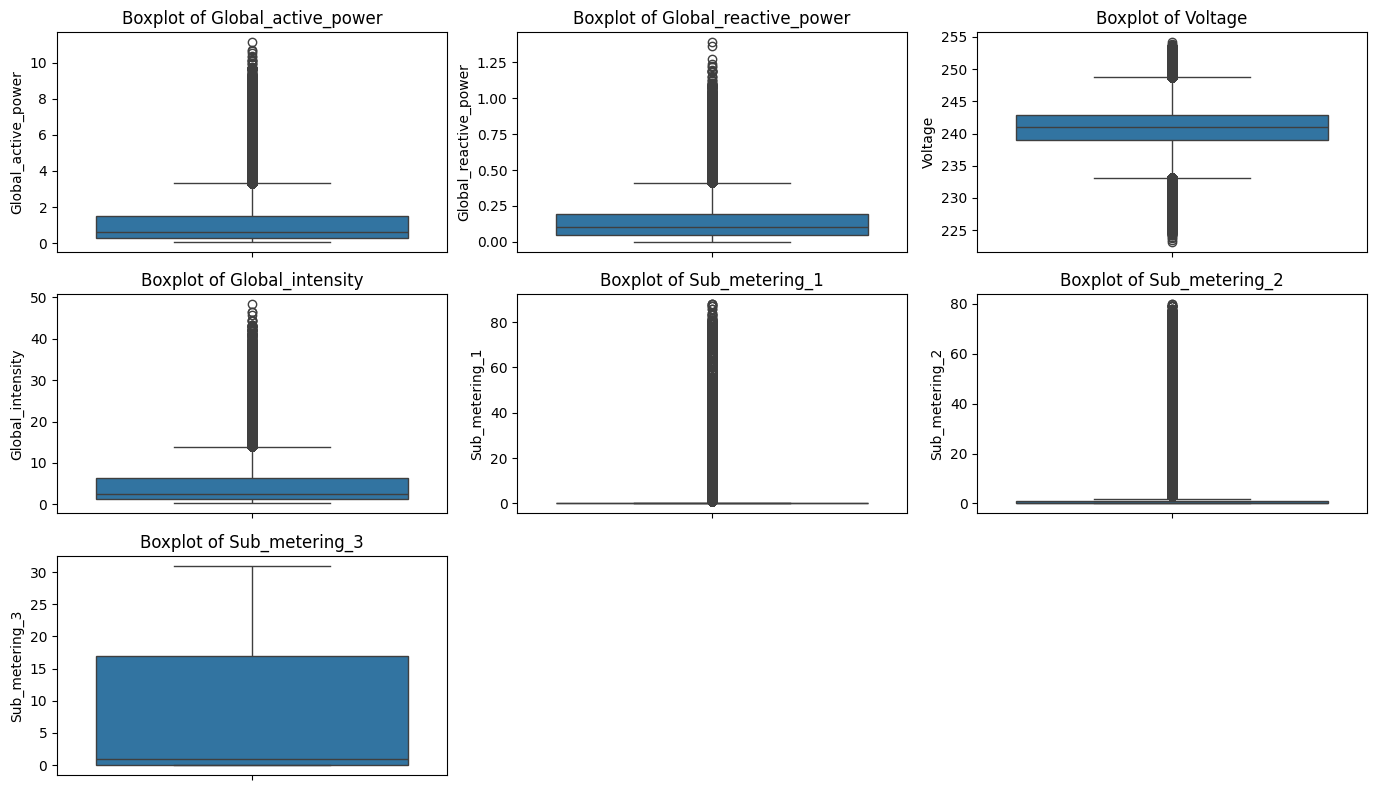

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numeric columns
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [12]:
# Capping outliers for all numeric columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values outside the bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
print("Outliers have been capped using the IQR method.")

Outliers have been capped using the IQR method.


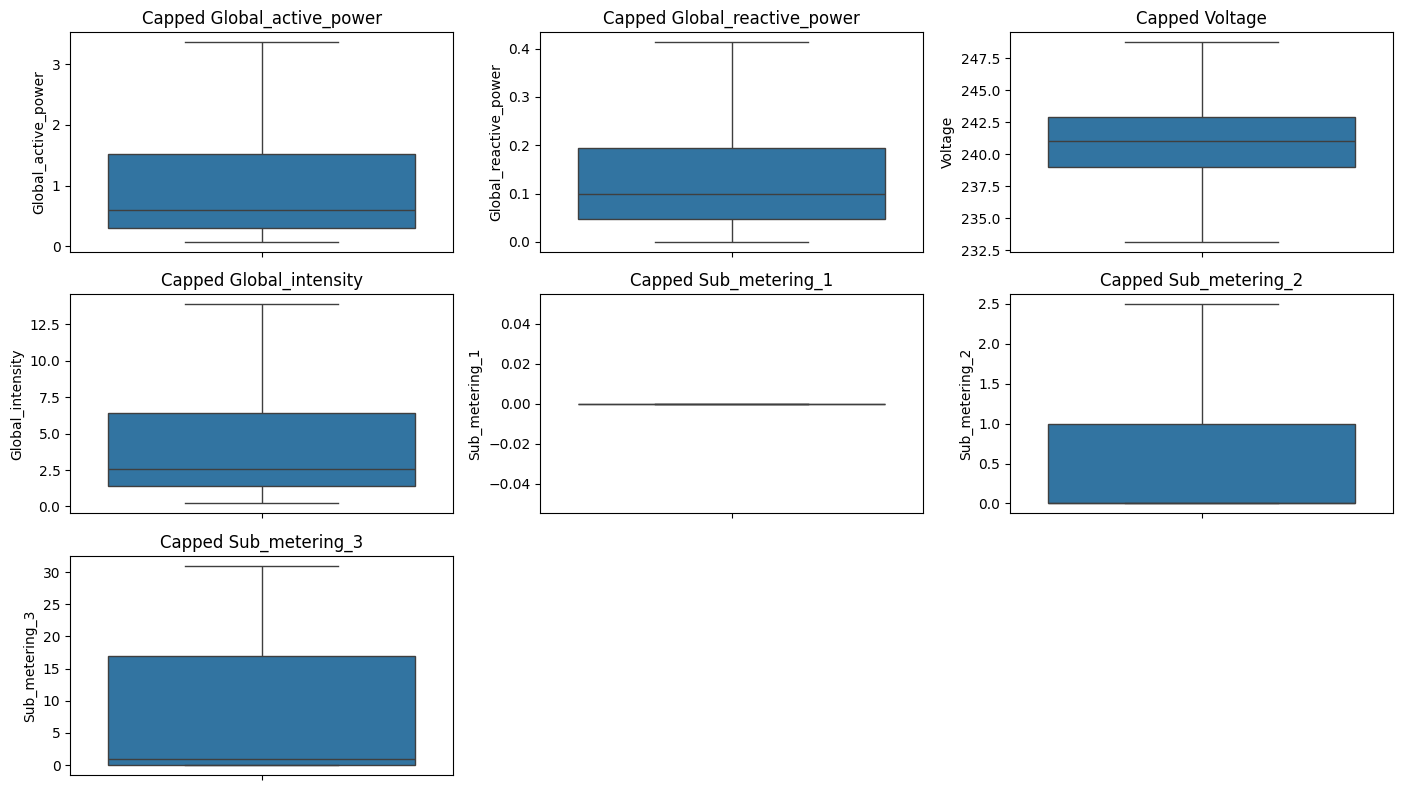

In [13]:
# Visualize after capping
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Capped {col}')
plt.tight_layout()
plt.show()

Correlation Matrix

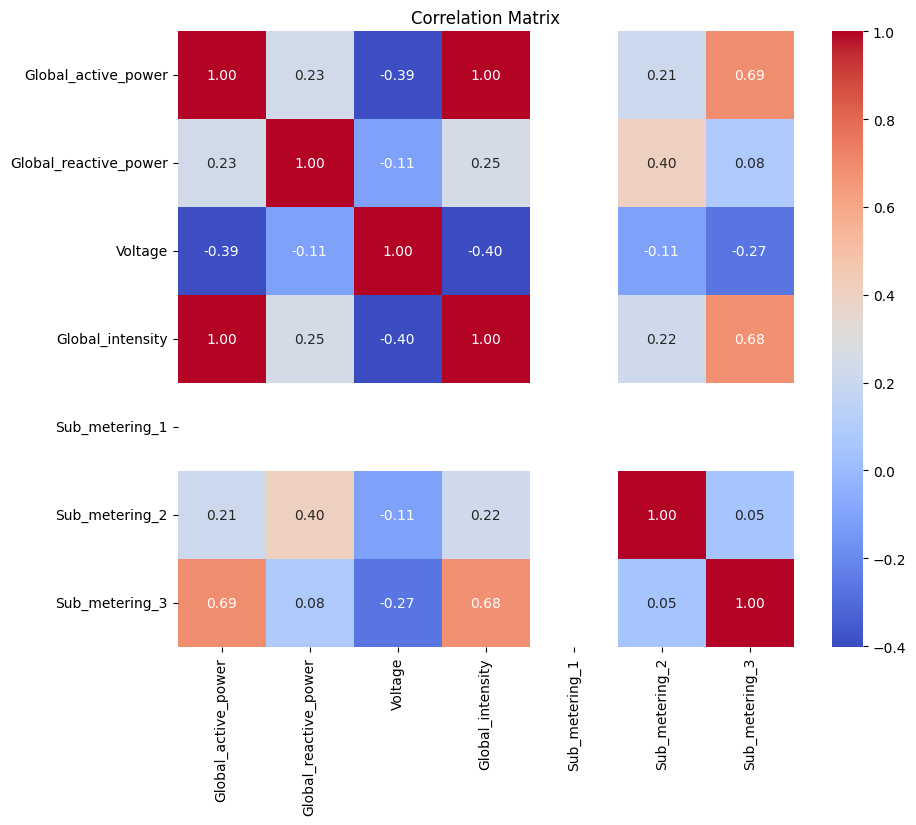

In [14]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix')
plt.show()

Distributions of Variables

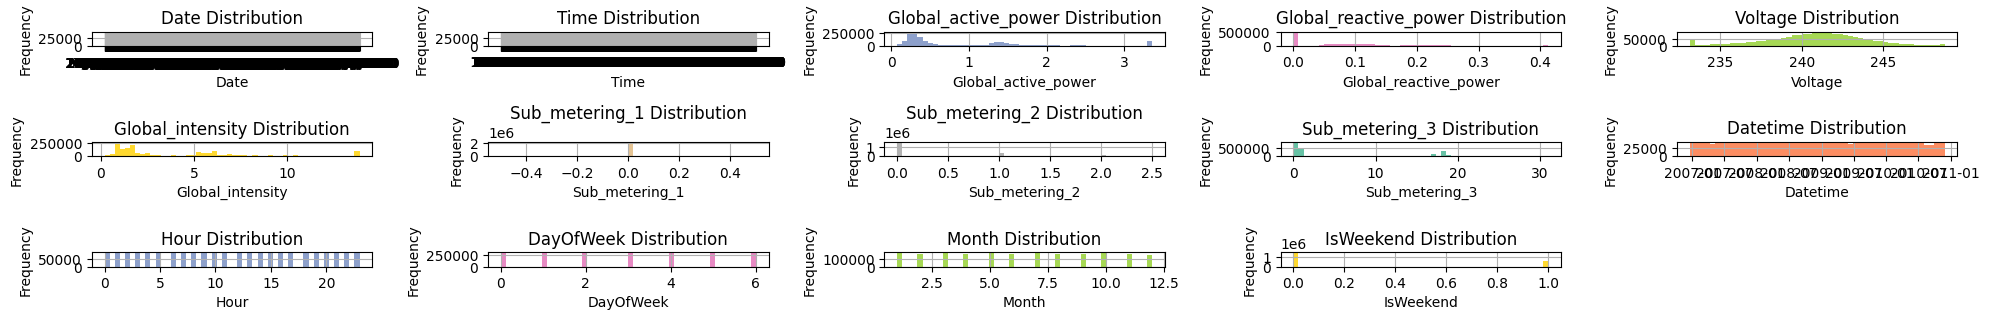

In [15]:
colors = sns.color_palette("Set2", len(df.columns))

plots_per_row = 5

num_rows = len(df.columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(20, 15))
axes = axes.flatten()

for i, (col, color) in enumerate(zip(df.columns, colors)):
    df[col].hist(bins=50, ax=axes[i], color=color)
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Scaling the Data

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaled_features = scaler.fit_transform(df[numeric_cols])

# df_scaled = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
df_scaled = df.copy()
df_scaled[numeric_cols] = scaled_features
print(df_scaled.head())

         Date      Time  Global_active_power  Global_reactive_power   Voltage  \
0  16/12/2006  17:24:00             2.522003               2.743463 -1.919123   
1  16/12/2006  17:25:00             2.522003               2.743463 -2.304722   
2  16/12/2006  17:26:00             2.522003               2.743463 -2.413073   
3  16/12/2006  17:27:00             2.522003               2.743463 -2.269668   
4  16/12/2006  17:28:00             2.522003               2.743463 -1.651434   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0          2.496284             0.0        0.773082        1.249421   
1          2.496284             0.0        0.773082        1.130897   
2          2.496284             0.0        2.134098        1.249421   
3          2.496284             0.0        0.773082        1.249421   
4          2.496284             0.0        0.773082        1.249421   

             Datetime  Hour  DayOfWeek  Month  IsWeekend  
0 2006-12-16 17:24:00    17

Creating Lag Feature

In [17]:
for lag in range(1, 4):
    df_scaled[f'Global_active_power_lag_{lag}'] = df_scaled['Global_active_power'].shift(lag)
    df_scaled[f'Global_reactive_power_lag_{lag}'] = df_scaled['Global_reactive_power'].shift(lag)
    df_scaled[f'Voltage_lag_{lag}'] = df_scaled['Voltage'].shift(lag)
    df_scaled[f'Global_intensity_lag_{lag}'] = df_scaled['Global_intensity'].shift(lag)
    df_scaled[f'Sub_metering_1_lag_{lag}'] = df_scaled['Sub_metering_1'].shift(lag)
    df_scaled[f'Sub_metering_2_lag_{lag}'] = df_scaled['Sub_metering_2'].shift(lag)
    df_scaled[f'Sub_metering_3_lag_{lag}'] = df_scaled['Sub_metering_3'].shift(lag)

    df_scaled.dropna(inplace=True)

    print(df_scaled.head())

         Date      Time  Global_active_power  Global_reactive_power   Voltage  \
1  16/12/2006  17:25:00             2.522003               2.743463 -2.304722   
2  16/12/2006  17:26:00             2.522003               2.743463 -2.413073   
3  16/12/2006  17:27:00             2.522003               2.743463 -2.269668   
4  16/12/2006  17:28:00             2.522003               2.743463 -1.651434   
5  16/12/2006  17:29:00             2.522003               2.743463 -1.861761   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
1          2.496284             0.0        0.773082        1.130897   
2          2.496284             0.0        2.134098        1.249421   
3          2.496284             0.0        0.773082        1.249421   
4          2.496284             0.0        0.773082        1.249421   
5          2.496284             0.0        2.134098        1.249421   

             Datetime  ...  DayOfWeek  Month  IsWeekend  \
1 2006-12-16 17:25:00  ... 

Modeling and Evaluation

Split Test and Train dataset

In [18]:
target = 'Global_active_power'
features = ['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

X = df[features]
y = df[target]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and test sets created: ")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

Training and test sets created: 
X_train: (1639424, 6), X_test: (409856, 6)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

#Evaluation
#With RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression RMSE: {rmse_lr:.4f}")

#With MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression MAE: {mae_lr:.4f}")

#Save results to global metrics
global metrics
metrics = {'Model': ['Linear Regression'], 'RMSE': [rmse_lr], 'MAE': [mae_lr]}

Linear Regression RMSE: 0.0393
Linear Regression MAE: 0.0246


Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

#Evaluation
#With RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree RMSE: {rmse_dt:.4f}")

#With MAE
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"Decision Tree MAE: {mae_dt:.4f}")

#Update the global metrics
metrics['Model'].append('Decision Tree')
metrics['RMSE'].append(rmse_dt)
metrics['MAE'].append(mae_dt)

Decision Tree RMSE: 0.0460
Decision Tree MAE: 0.0229


Plot a comparison chart of RMSE and MAE

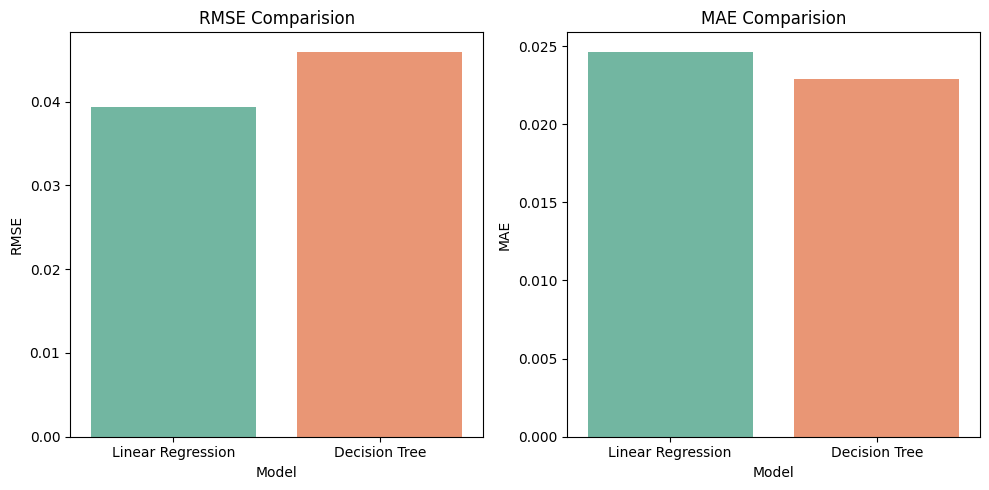

In [23]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(10, 5))

#RMSE chart
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='RMSE', data=metrics_df, hue='Model', palette='Set2')
plt.title('RMSE Comparision')
plt.ylabel('RMSE')

#MAE chart
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MAE', data=metrics_df, hue='Model', palette='Set2')
plt.title('MAE Comparision')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

Comparison chart

Calculate average monthly energy consumption (converted to kWH)

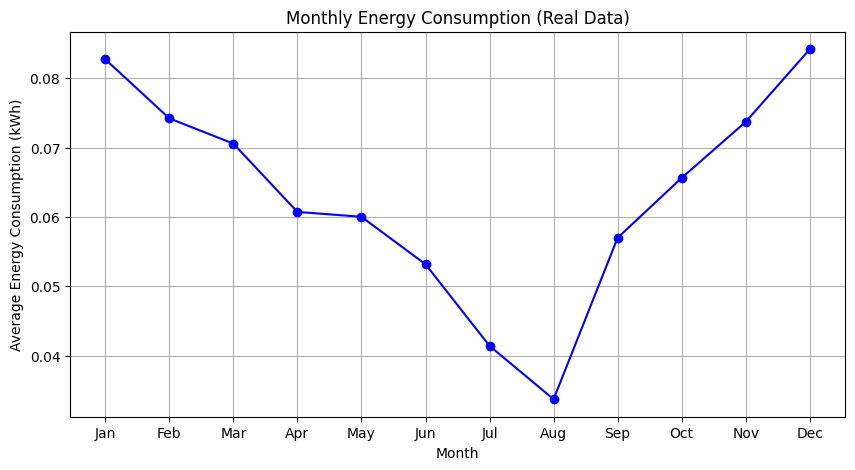

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg = df.groupby('Month')['Global_active_power'].mean() * 60 / 1000

plt.figure(figsize=(10, 5))
plt.plot(month, monthly_avg, marker='o', color='blue')
plt.title('Monthly Energy Consumption (Real Data)')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption (kWh)')
plt.grid(True)
plt.show()

Monthly Sub-metering Consumption Analysis

<Figure size 1000x600 with 0 Axes>

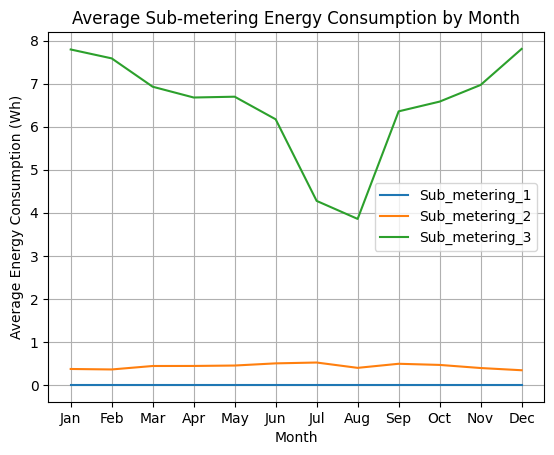

In [25]:
sub_metering_monthly = df.groupby('Month')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
plt.figure(figsize=(10, 6))
sub_metering_monthly.plot()
plt.title('Average Sub-metering Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption (Wh)')
plt.grid(True)
plt.legend(['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
plt.xticks(ticks=range(1, 13), labels=month)
plt.show()

Hourly Energy Consumption Analysis

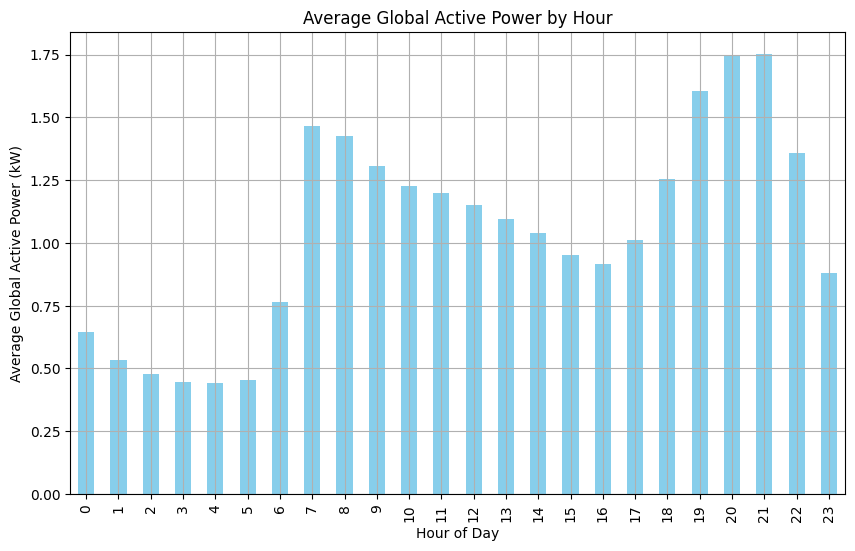

In [26]:
hourly_avg = df.groupby('Hour')['Global_active_power'].mean()
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Global Active Power by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power (kW)')
plt.grid(True)
plt.show()

Energy consumption analysis by day of the week

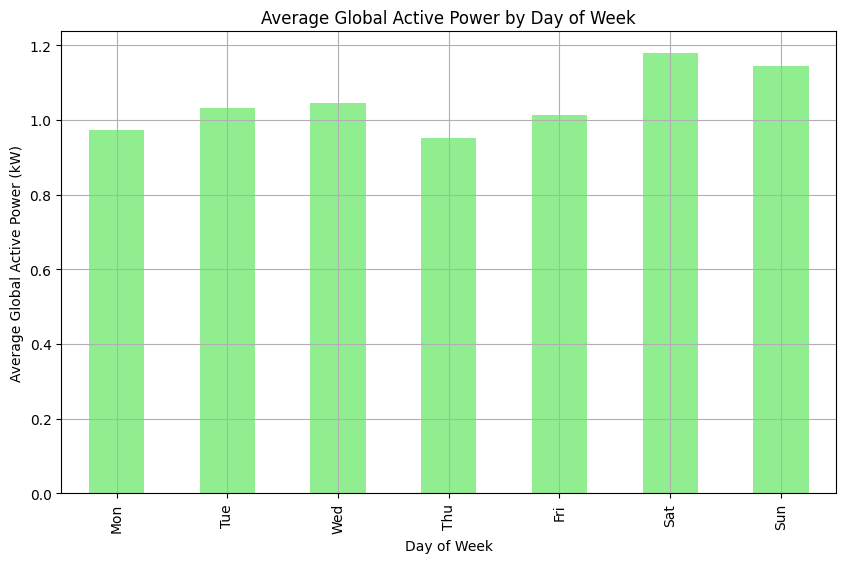

In [27]:
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_avg = df.groupby('DayOfWeek')['Global_active_power'].mean()
plt.figure(figsize=(10, 6))
daily_avg.plot(kind='bar', color='lightgreen')
plt.title('Average Global Active Power by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Global Active Power (kW)')
plt.grid(True)
plt.xticks(ticks=range(7), labels=day_labels)
plt.show()

Actual and Predicted Energy Comsumption Using Linear Regression

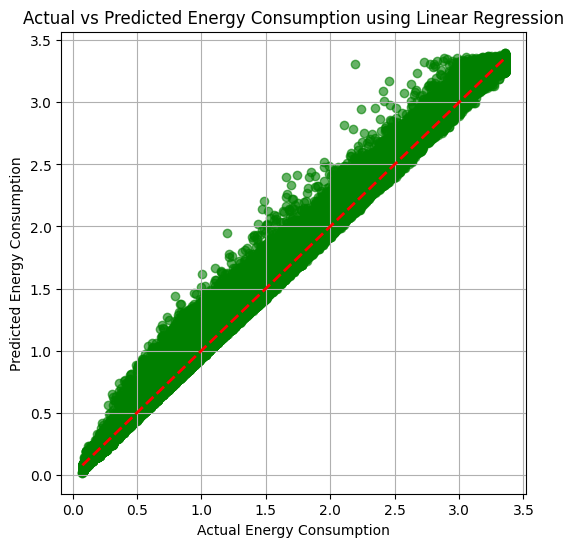

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # đường y=x
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption using Linear Regression')
plt.grid(True)
plt.show()


Actual vs Predicted Energy Consumption Using Decision Tree

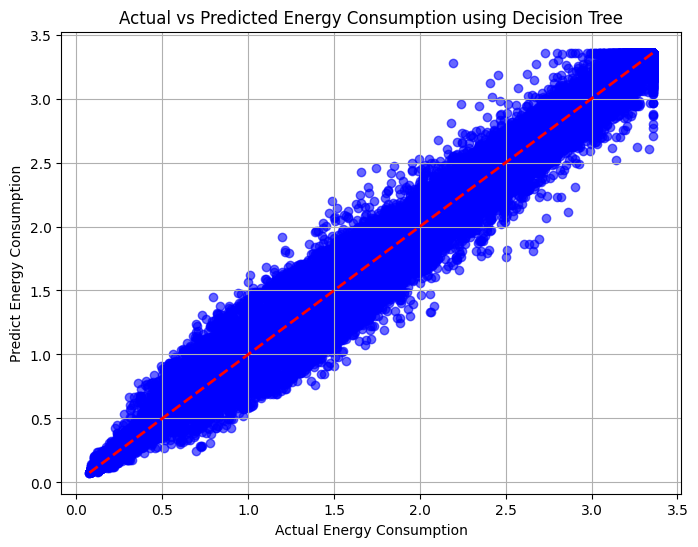

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predict Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption using Decision Tree')
plt.grid(True)
plt.show()

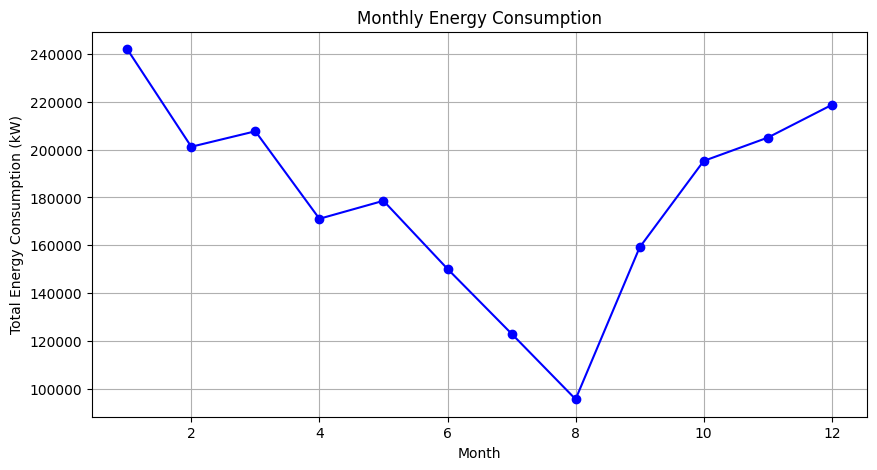

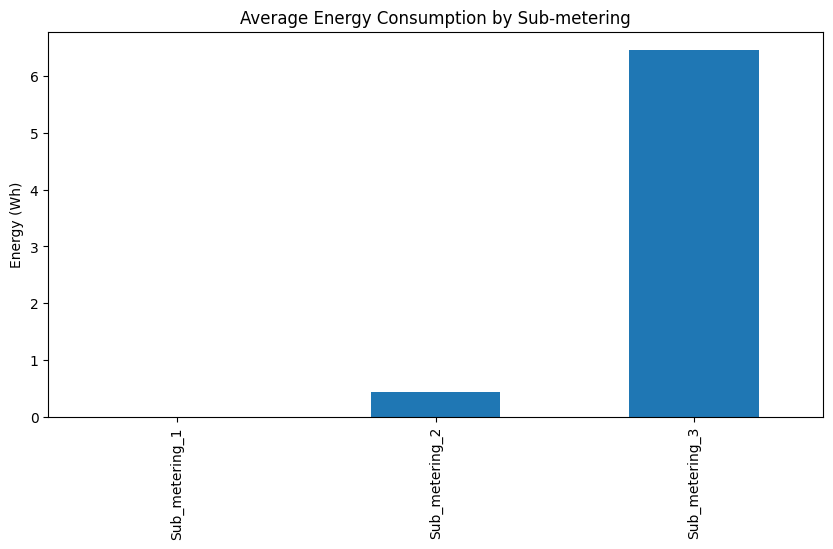

Insights for Energy Efficiency and Planning (Monthly and Sub-metering):
- Monthly consumption shows a significant variation throughout the year, with the highest usage in January (Month 1) and December (Month 12), likely due to incresed heating demands during winter months. The lowest consumption is observed in August (Month 8), suggesting reduced energy needs during warmer periods.
- Recommendation: Implement energy-efficient heating systems or enhance insulation to mitigate high consumption during winter months (January and December).
- Sub-metering analysis indicates which areas (kitchen, laundry, or heating/cooling) consume the most energy.
- Sub-metering analysis reveals that Sub_metering_3 has the highest average energy consumption, followed by a much lower usage in Sub_metering_2, while Sub_metering_1 shows minimal consumption.
- Recommendation: Prioritize upgrading to energy-efficient heating or cooling systems for Sub_metering_3 to reduce overall energy usage. Additionally, mo

In [31]:
# Cell 22: Insights - Tiêu thụ năng lượng theo tháng và sub-metering
import matplotlib.pyplot as plt

# Tiêu thụ theo tháng
monthly_energy = df.groupby('Month')['Global_active_power'].sum()
plt.figure(figsize=(10, 5))
monthly_energy.plot(marker='o', color='blue')
plt.title('Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Total Energy Consumption (kW)')
plt.grid(True)
plt.show()

# Đóng góp của sub-metering
plt.figure(figsize=(10, 5))
sub_metering_means = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
sub_metering_means.plot(kind='bar')
plt.title('Average Energy Consumption by Sub-metering')
plt.ylabel('Energy (Wh)')
plt.show()

# Giải thích insights
print("Insights for Energy Efficiency and Planning (Monthly and Sub-metering):")
print("- Monthly consumption shows a significant variation throughout the year, with the highest usage in January (Month 1) and December (Month 12), likely due to incresed heating demands during winter months. The lowest consumption is observed in August (Month 8), suggesting reduced energy needs during warmer periods.")
print("- Recommendation: Implement energy-efficient heating systems or enhance insulation to mitigate high consumption during winter months (January and December).")
print("- Sub-metering analysis indicates which areas (kitchen, laundry, or heating/cooling) consume the most energy.")
print(f"- Sub-metering analysis reveals that Sub_metering_3 has the highest average energy consumption, followed by a much lower usage in Sub_metering_2, while Sub_metering_1 shows minimal consumption.")
print("- Recommendation: Prioritize upgrading to energy-efficient heating or cooling systems for Sub_metering_3 to reduce overall energy usage. Additionally, monitor and optimize the use of appliances associated with Sub_metering_2 during peak times.")
print("- Plan appliance usage based on sub_metering data to balance energy allocation, such as scheduling high-energy tasks outside peak consumption hours identified in the monthly trend.")